In [3]:
using Statistics, Plots, LaTeXStrings, Revise
gr(grid=false,legend=false,size=(400,200),titlefontsize=10)


Plots.GRBackend()

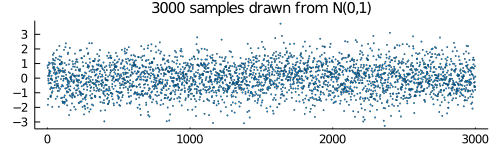

In [4]:
N = 3000
x = randn(N)
n = 1:N 
plot(n,x,seriestype=:scatter,ms=1,size=(500,150))
title!("$N samples drawn from N(0,1)")

In [5]:
mean(x),var(x) # from the Statistics package

(-0.011433256397783935, 1.0116095819240467)

In [6]:
T = 1; N = 500; dt = T/N
t = LinRange(0,T,N+1)
W = zeros(N)
ΔW = sqrt(dt)*randn(N); #all independent

In [7]:
mean(ΔW), var(ΔW), dt, length(t)

(-0.00012141833968737889, 0.002163138560568514, 0.002, 501)

In [8]:
W[1] = ΔW[1] 
for j in 2:N 
    W[j] = W[j-1] + ΔW[j]
end
W = [0.0; W]; # careful here! - in jupyter we can do out of order execution

In [9]:
mean(W), length(W)


(0.34663430583236465, 501)

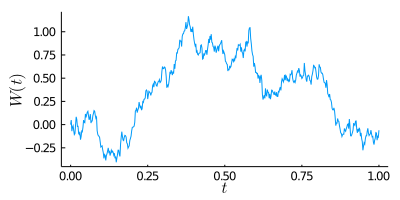

In [10]:
dt = T/N
plot(t,W)
xlabel!(L"t");ylabel!(L"W(t)")

In [11]:
"""
`t,ΔW,W = wienerpath(N,T)`

Sample a path of the Wiener process over time interval `[0,T]` for `N` increments `ΔW` and initial condition `W(t=0)=W[1]=0.0`. 

Outputs:

- `t` time vector, of length `N+1`
- `ΔW` vector of increments, of length `N`
- `W` vector of `W[j]` at time points `t=t_j` with `j=1,2,...,N` corresponding to increments. The initial value is included, giving a vector of length `N+1`.
"""
function wienerpath(N,T)
    dt = T/N
    t = 0:dt:T |> collect
    dW = sqrt(dt)*randn(N)
    W = cumsum(dW)
    W = [0.0;W]
    return t,dW,W
end

wienerpath

In [12]:
?wienerpath

search: wienerpath



`t,ΔW,W = wienerpath(N,T)`

Sample a path of the Wiener process over time interval `[0,T]` for `N` increments `ΔW` and initial condition `W(t=0)=W[1]=0.0`. 

Outputs:

  * `t` time vector, of length `N+1`
  * `ΔW` vector of increments, of length `N`
  * `W` vector of `W[j]` at time points `t=t_j` with `j=1,2,...,N` corresponding to increments. The initial value is included, giving a vector of length `N+1`.


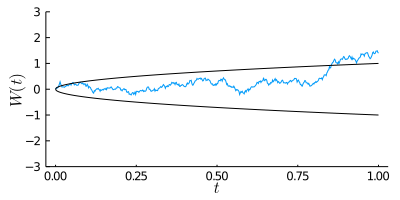

In [13]:
N = 500
t,ΔW,W = wienerpath(N,1)
p1=plot(t,W)
plot!(t,sqrt.(t),linewidth=1,c=:black)
plot!(t,-sqrt.(t),linewidth=1,c=:black)
ylims!(-3,3);xlabel!(L"t");ylabel!(L"W(t)")

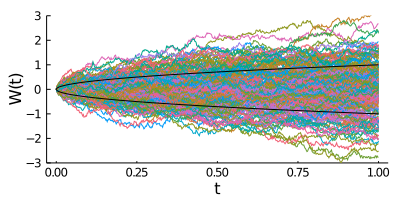

ERROR: syntax error
ERROR: syntax error
ERROR: syntax error


In [16]:
Np = 50
for j = 1:Np
    t,ΔW,W = wienerpath(N,1)
    plot!(p1,t,W,legend=false)
end
plot!(t,sqrt.(t),linewidth=1,c=:black)
plot!(t,-sqrt.(t),linewidth=1,c=:black)
title!(L"\langle W(t)^2\rangle=\sqrt{t}\;\; \textrm{spreading of sample paths}")

┌ Info: Saved animation to 
│   fn = /Users/ericxu/Desktop/codes/wpaths.gif
└ @ Plots /Users/ericxu/.julia/packages/Plots/GDtiZ/src/animation.jl:104


Plots.AnimatedGif("/Users/ericxu/Desktop/codes/wpaths.gif")
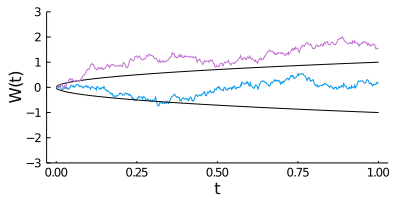

In [17]:
N = 500
t,ΔW,W = wienerpath(N,1)
p1 = plot(t,W)
plot!(t,sqrt.(t),linewidth=1,c=:black)
plot!(t,-sqrt.(t),linewidth=1,c=:black)
ylims!(-3,3);xlabel!("t");ylabel!("W(t)")

anim = @animate for i=1:150
t,ΔW,W = wienerpath(N,1)
plot!(p1,t,W)
end

gif(anim,"./wpaths.gif", fps = 12)

## FPE Solution for Brownian motion

diffusion equation
$$\frac{\partial p(x,t|0,0)}{\partial t} =\frac{1}{2} \frac{\partial^2  p(x,t|0,0)}{\partial x^2} $$
with initial condition $p(x,t=0|0,0)=n\delta(x)$ has solution
$$p(x,t|0,0)=\frac{n}{\sqrt{2\pi t}} e^{-x^2/2t}$$

In [18]:
p(x,t) = exp(-x^2/(2t))/sqrt(2π*t) # scalar function definition

p (generic function with 1 method)

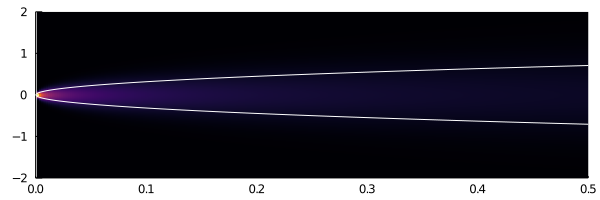

In [19]:
y = LinRange(-2,2,500)
heatmap(t,y,p.(y,t'),size=(600,200),transpose=false) # broadcast
plot!(t,sqrt.(t),lw=1,c=:white)
plot!(t,-sqrt.(t),lw=1,c=:white)
xlims!(0,.5);ylims!(-2,2)

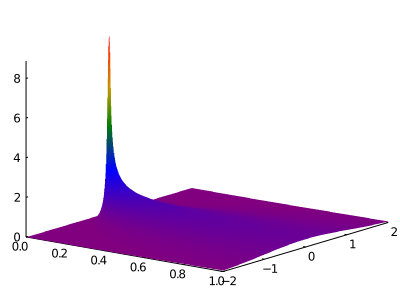

In [20]:
# another plot example
p1=surface(t,y,p.(y,t'),c = :rainbow,size=(400,300))
plot!(p1, camera=(40, 40))

# Ensemble average 


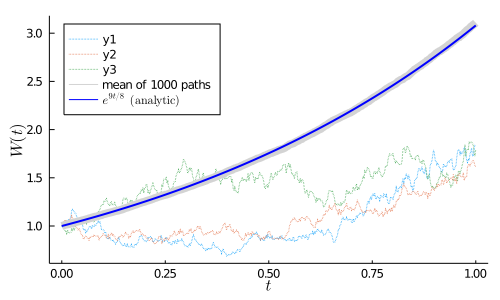

ERROR: syntax error
ERROR: syntax error
ERROR: syntax error


In [21]:
T = 1; N = 500; Δt = T/N 
t = LinRange(0,T,N+1)
Np = 1000
ΔW = sqrt(Δt)*randn(N,Np)
W = cumsum(ΔW,dims=1)
W = [zeros(1,Np); W]
U = @. exp(t + 0.5*W) # broadcast (!!)
Ū = mean(U,dims=2) # path average at each time
plot(t,U[:,1:3],s=:dot,size=(500,300)) # show a few paths
plot!(t,Ū,w=8,c=:lightgrey,label="mean of $Np paths",legend=:topleft)
plot!(t,exp.(9t/8),w=2,c=:blue,label=L"e^{9t/8}\;\;\textrm{(analytic)}")
xlabel!(L"t");ylabel!(L"W(t)")
title!(L"\langle e^{t+W(t)/2}\rangle")